In [3]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(repr)
  library(tidymodels)
})
options(repr.matrix.max.rows = 6)

We first load the data into our notebook

In [4]:
players = read_csv("ProjectData/players.csv", show_col_types = FALSE)
players

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


Next we wrangle the data so that we only have the variables we need and convert all categorical variables to be numerical. Categorical variables will be a little complicated here as we have multiple categories a player can fall into. To solve this, we will split each categorical into a false/true variable for that category. We can then assign 0/1 values to true/false values respectively.

In [5]:
players_clean <- players |>
    select(experience, subscribe, gender, age) |>
    mutate(
        # Convert `experience` to boolean columns for each category
        Pro_experience = as.numeric(experience == "Pro"),
        Veteran_experience = as.numeric(experience == "Veteran"),
        Amateur_experience = as.numeric(experience == "Amateur"),
        Regular_experience = as.numeric(experience == "Regular"),
        Beginner_experience = as.numeric(experience == "Beginner"),
        
        # Convert `gender` to boolean columns for each category
        Male_gender = as.numeric(gender == "Male"),
        Female_gender = as.numeric(gender == "Female"),
        Non_binary_gender = as.numeric(gender == "Non-binary"),
        Agender_gender = as.numeric(gender == "Agender"),
        Two_Spirited_gender = as.numeric(gender == "Two-Spirited"),
        Prefer_not_to_say_gender = as.numeric(gender == "Prefer not to say"),
        Other_gender = as.numeric(gender == "Other"),

        # Convert the subscribe boolean
        subscribe = as.numeric(subscribe)
    ) |>
    select(-experience, - gender)






players_clean

subscribe,age,Pro_experience,Veteran_experience,Amateur_experience,Regular_experience,Beginner_experience,Male_gender,Female_gender,Non_binary_gender,Agender_gender,Two_Spirited_gender,Prefer_not_to_say_gender,Other_gender
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,1,0,0,0,0,1,0,0,0,0,0,0
1,17,0,1,0,0,0,1,0,0,0,0,0,0
0,17,0,1,0,0,0,1,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,17,0,0,1,0,0,0,0,0,0,0,1,0
0,17,0,0,1,0,0,1,0,0,0,0,0,0
1,91,1,0,0,0,0,0,0,0,0,0,0,1


Here we have wrangled the data in a form that is ready for linear regression. We have variables that indicate categories and ones and zeros that represent true and false, respectively.

We will now provide some visualizations to show the spread of the data for each of the categorical variables.

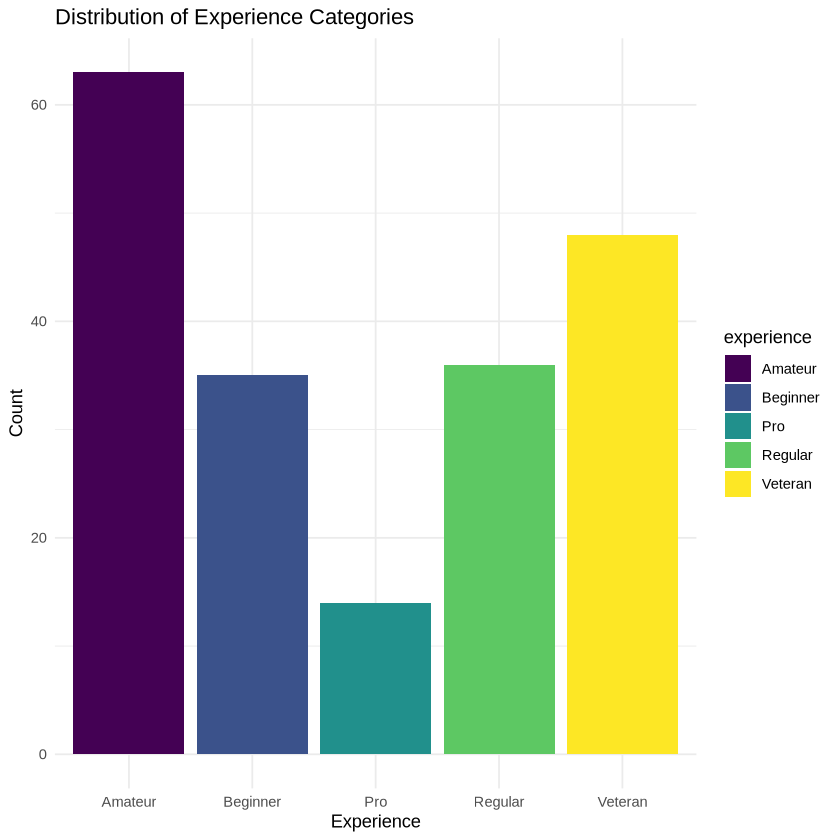

In [8]:
ggplot(players, aes(x = experience, fill = experience)) +
  geom_bar() +
  labs(title = "Distribution of Experience Categories", x = "Experience", y = "Count") +
  theme_minimal() +
  scale_fill_viridis_d()

Figure 1. Distribution of experience categories

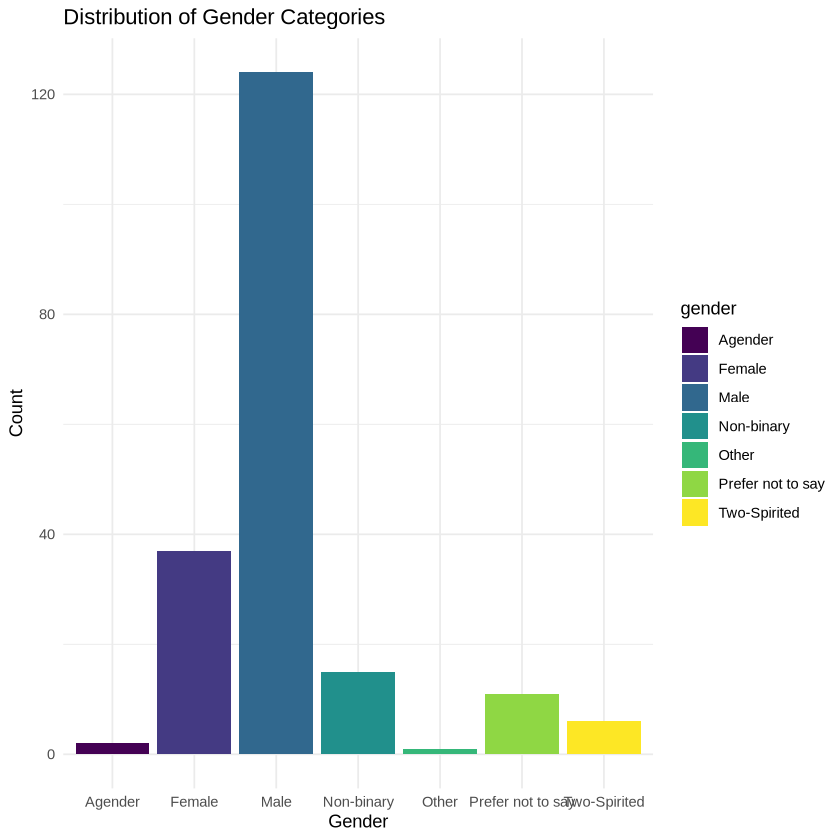

In [9]:
ggplot(players, aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Distribution of Gender Categories", x = "Gender", y = "Count") +
  theme_minimal() +
  scale_fill_viridis_d()

Figure 2. Distribution of gender categories

We will now split our cleaned data into a 25/75 testing/training split, train using training data, and calculate RMPSE using the testing data

In [ ]:
split = 